In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:

#Ex. 1.1:

class Linear(torch.nn.Module):
    def __init__(self, w0, w1, b):
        super().__init__()
        w = torch.tensor([[w0],[w1]])
        b = torch.tensor(b)
        self.w = torch.nn.Parameter(w, requires_grad=True)
        self.b = torch.nn.Parameter(b, requires_grad=True)
        
    def forward(self, x):        
        # return self.w.T @ x + self.b
        # x: *, 2, 1
        # w: 2, 1
        return self.w.T @ x  + self.b 

# initialize three Linear classes with different weights and bias
layer0_0 = Linear(0.8,-0.5, 0.5)
layer0_1 = Linear(-1.0,-0.1, -0.2)
layer1 = Linear(-0.5,-0.4, -0.2)


x = torch.tensor([[[0.3], [0.1]]]) # note that 
# apply forward for each linear layer and print its result
y_hat0_0 = layer0_0.forward(x)
y_hat0_1 = layer0_1.forward(x)
y_hat1 = layer1.forward(x)

print(y_hat0_0)
print(y_hat0_1)
print(y_hat1)


tensor([[[0.6900]]], grad_fn=<AddBackward0>)
tensor([[[-0.5100]]], grad_fn=<AddBackward0>)
tensor([[[-0.3900]]], grad_fn=<AddBackward0>)


torch.Size([1, 1, 1])
tensor([[[0.6900]]], grad_fn=<MaximumBackward0>) tensor([[[0.]]], grad_fn=<MaximumBackward0>)


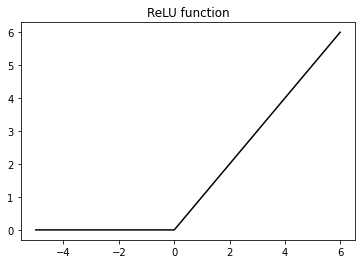

In [4]:
#Ex. 1.2

def relu(y_hat):
    #return torch.clamp(y_hat, min=0) #max(0,y_hat)#torch.max(torch.zeros_likely(y_hat), y_hat)
    return torch.max(torch.zeros_like(y_hat), y_hat)


# apply relu to y_hat0_1 and y_hat0_0
z_0 = relu(y_hat0_0)
z_1 = relu(y_hat0_1)

print(z_0.shape)
print(z_0, z_1)


xaxis = torch.arange(-5, 6, step=0.01)

plt.plot(xaxis, relu(xaxis), 'black', label="ReLU function")
plt.title("ReLU function")
plt.show()
plt.close()



In [21]:
#Ex. 1.3
z = torch.cat((z_0,z_1), dim=-2) # R * x 2 x 1
                             #dim -3   - 2  -1
#reverse index approach is broadcastable to any dimension (*)
print(z)
print(z.shape)
y_hat = layer1.forward(z)
print(y_hat)

tensor([[[0.6900],
         [0.0000]]], grad_fn=<CatBackward0>)
torch.Size([1, 2, 1])
tensor([[[-0.5450]]], grad_fn=<AddBackward0>)


c:\Users\zheng\.conda\envs\FinRL\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


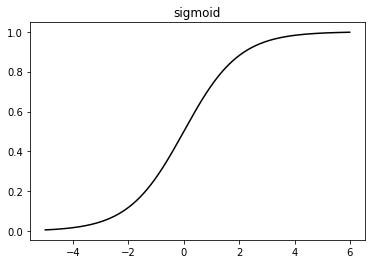

In [34]:
def sigmoid(y_hat):
    return torch.nn.functional.sigmoid(y_hat)

xaxis = torch.arange(-5, 6, step=0.01)
plt.plot(xaxis, sigmoid(xaxis), 'black', label="sigmoid")
plt.title("sigmoid")
plt.show()
plt.close()

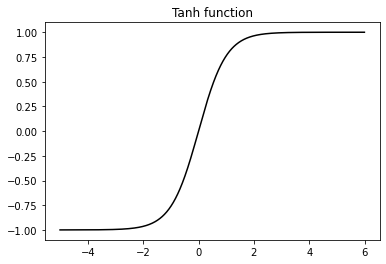

In [23]:
def tanh(y_hat):
    return torch.tanh(y_hat)

xaxis = torch.arange(-5, 6, step=0.01)
plt.plot(xaxis, tanh(xaxis), 'black', label="Tanh function")
plt.title("Tanh function")
plt.show()
plt.close()

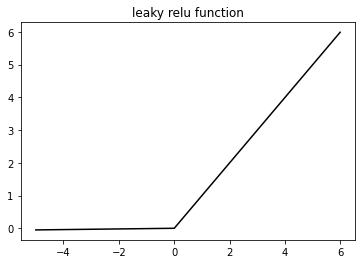

In [41]:
def l_relu(y_hat):
    return torch.nn.functional.leaky_relu(y_hat)

xaxis = torch.arange(-5, 6, step=0.01)
plt.plot(xaxis, l_relu(xaxis), 'black', label="leaky relu function")
plt.title("leaky relu function")
plt.show()
plt.close()

In [45]:

#Ex. 1.4: 

class TwoLayerNN(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.layer0_0 = Linear(0.8,-0.5, 0.5)
        self.layer0_1 = Linear(-0.3,-0.1, -0.2)
        self.layer1 = Linear(-0.5,-0.4, -0.8)
        
    def forward(self, x):

        # x: *, 2, 1
        y_hat0_0 = self.layer0_0.forward(x)
        y_hat0_1 = self.layer0_1.forward(x)

        # y_hat0_0: *, 1, 1
        # y_hat0_1: *, 1, 1
        #z_0 = relu(y_hat0_0)
        #z_1 = relu(y_hat0_1)
        z_0 = tanh(y_hat0_0)
        z_1 = tanh(y_hat0_1)
        

        # z_0: *, 1, 1
        # z_1: *, 1, 1
        
        z = torch.cat((z_0,z_1), dim= -2)
        
        # z: *, 2, 1
        # print(z_0)
        # print(z_0.shape)
        #print(z)
        #print(z.shape)
        y_hat = self.layer1.forward(z)

        return y_hat

x1 = torch.tensor([[0.3], [0.5]])
x2 = torch.tensor([[0.3], [0.5]])

# stack the inputs 
x = torch.stack([x1,x2], dim=0)
x=x.unsqueeze(0)
print("x shape", x.shape)
#print (x)

# initialize model
model = TwoLayerNN()
y_hat = model(x)

print("y_hat" ,y_hat)
print("y_hat0_0" ,y_hat0_0)
print("y_hat0_1" ,y_hat0_1)
print("z_0", z_0)
print("z_1", z_1)



x shape torch.Size([1, 2, 2, 1])
y_hat tensor([[[[-0.8961]],

         [[-0.8961]]]], grad_fn=<AddBackward0>)
y_hat0_0 tensor([[[0.6900]]], grad_fn=<AddBackward0>)
y_hat0_1 tensor([[[-0.5100]]], grad_fn=<AddBackward0>)
z_0 tensor([[[0.6900]]], grad_fn=<MaximumBackward0>)
z_1 tensor([[[0.]]], grad_fn=<MaximumBackward0>)


[tensor([[1.]]), tensor([[-1.]]), tensor([[1.]]), tensor([[-1.]])]


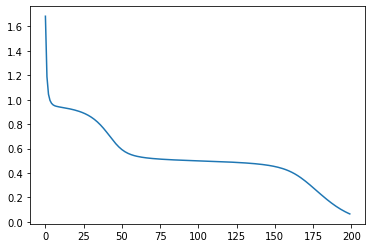

In [46]:

# Ex. 1.5
input_features = [torch.tensor([[1.0], [0.5]], requires_grad=False), 
                torch.tensor([[-1.0], [1.5]], requires_grad=False),
                torch.tensor([[-1.0], [0.6]], requires_grad=False),
                torch.tensor([[0.1], [-0.3]], requires_grad=False)]


# the labels for XOR
labels = [torch.tensor([[1.0]]),torch.tensor([[-1.0]]), torch.tensor([[1.0]]), torch.tensor([[-1.0]])]
print(labels)


epochs = 200
learning_rate = 0.2

def loss_function(y_hat, y):
    return (y_hat - y).pow(2).mean()
    
def optimize_weights(model, learning_rate):
    w = model.w
    b = model.b
    w_grad = model.w.grad
    b_grad = model.b.grad

    # update the weights here with learning rate
    w_new = w - learning_rate * w_grad
    b_new = b - learning_rate * b_grad

    # update the model weight
    model.w.data = w_new
    model.b.data = b_new 

# initialize the model
model = TwoLayerNN()



def train(model, loss_function, epochs, learning_rate, optimize_weights):
    losses = []
    for epoch in range(epochs):

        # stack the input features, and labels along the first dim
        x = torch.stack(input_features,  dim=0)
        # apply model
        y_hat = model(x)
        
        # apply loss function
        loss = loss_function(y_hat, torch.stack(labels, dim=0))
        
        losses.append(loss.detach().item())
        # zero_grad
        model.zero_grad()
        # perform backward
        loss.backward() #backpropagation

        # optimize weights for each layer
        for layer in [model.layer0_0, model.layer0_1, model.layer1]:
            optimize_weights(layer, learning_rate)

    return losses
    
losses = train(model, loss_function, epochs, learning_rate, optimize_weights)
plt.plot(losses)


torch.Size([1000000, 2, 1])


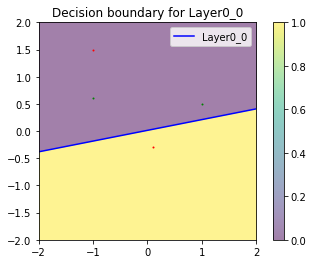

torch.Size([1000000, 2, 1])


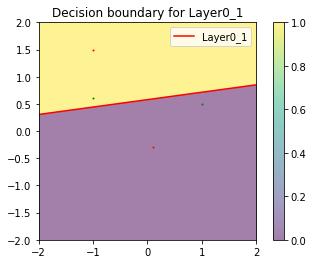

torch.Size([1000000, 2, 1])


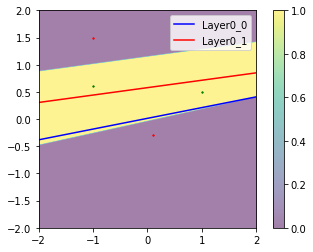

In [47]:
def decision_boundary(x0, w0, w1, b):
    x1 = -x0* w0/w1  - b/w1
    return x1


def plot_boundary_and_input_features(model, input_features, labels, plot_label, style):
    for x, y in zip(input_features, labels):
        if y.item() == -1:
            plt.scatter(x[0], x[1], c='red', s = 1)
        elif y.item() == 1:
            plt.scatter(x[0], x[1], c='green', s = 1)

    xaxis = torch.arange(-2, 2, step=0.01)

    w0 = model.w[0].detach()
    w1 = model.w[1].detach()
    b = model.b.detach()

    boundary = decision_boundary(xaxis, w0, w1, b)
    plt.plot(xaxis, boundary, style, label=plot_label)
    

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.legend()


def plot_neural_network_response(model):
    with torch.no_grad():
        yaxis = torch.linspace(-2, 2, steps=1000)
        xaxis = torch.linspace(-2, 2, steps=1000)
        # linspace = torch.stack([xaxis, yaxis])
        input_feats = torch.cartesian_prod(xaxis, yaxis)    # 100*100, 2
        input_feats = input_feats.unsqueeze(-1)             # 100*100, 2, 1
    

        print(input_feats.shape)
        response = model.forward(input_feats)
        
        response = response.reshape(1000, 1000)
        response = response.T # transpose as imshow origin is 'lower'.
        
        plt.imshow(response > 0, 
            extent=[min(xaxis),max(xaxis),min(yaxis),max(yaxis)],
            origin='lower',
            alpha=0.5)
        plt.colorbar()


plot_boundary_and_input_features(model.layer0_0, input_features, labels, "Layer0_0", 'blue')
plot_neural_network_response(model.layer0_0)
plt.title("Decision boundary for Layer0_0")
plt.show()
# plt.title("Decision boundary for Layer0_1")
plot_boundary_and_input_features(model.layer0_1, input_features, labels, "Layer0_1", 'red')
plot_neural_network_response(model.layer0_1)

plt.title("Decision boundary for Layer0_1")
plt.show()

plot_boundary_and_input_features(model.layer0_0, input_features, labels, "Layer0_0", 'blue')
plot_boundary_and_input_features(model.layer0_1, input_features, labels, "Layer0_1", 'red')

plot_neural_network_response(model)

